## Análise de series temporais é os registro de observações e feita em um passar de tempo, esse espaço de tempo é oque representa cada ponto.

# Alucar - Analisando as vendas

In [3]:
import pandas as pd

In [4]:
pd.read_csv('alucar.csv').head(10)

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63
5,2017-06-30,81
6,2017-07-31,101
7,2017-08-31,124
8,2017-09-30,148
9,2017-10-31,174


In [5]:
alucar = pd.read_csv('alucar.csv')

In [6]:
# antes de fazer gráficos é bom conhecer a base de dados, quantas linhas, colunas
# n registro
print('Quantidade de linhas e colnas: ', alucar.shape)

Quantidade de linhas e colnas:  (24, 2)


In [7]:
# quantos dados nulos?
print('Quantidade de dados nulos: ', alucar.isna().sum().sum())

Quantidade de dados nulos:  0


In [8]:
# tipos de dados
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [9]:
# convertendo variavel
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [10]:
import seaborn as sns

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt

In [12]:
print(sns.__version__)

0.11.2


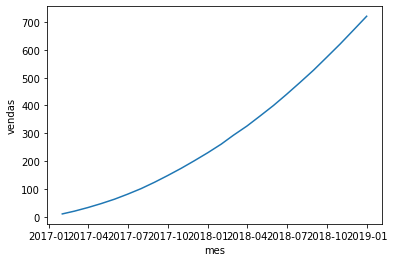

In [13]:
sns.lineplot(x='mes', y='vendas', data=alucar)

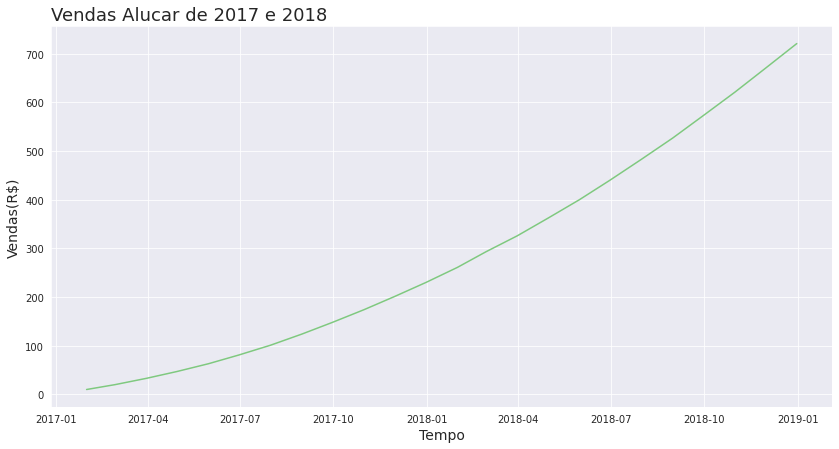

In [14]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(14, 7)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas(R$)', fontsize=14)
ax = ax

# decompondo as vendas

In [15]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [16]:
# o diff ele pega o mês posterior e subtrai do mês anterior e registra na linha
# do mês posterior
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


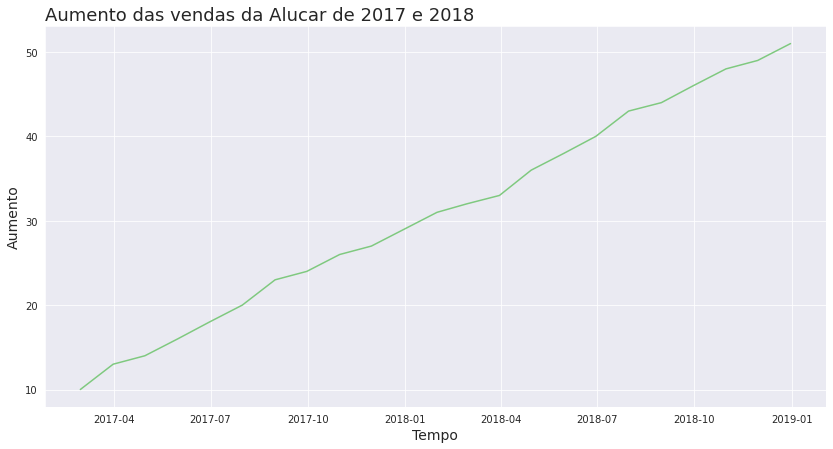

In [17]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(14, 7)
ax.set_title('Aumento das vendas da Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax = ax

In [18]:
# criando uma função para plotar grafico pronto
def plotar(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(14, 7)
  ax.set_title(titulo, loc='left', fontsize=18)
  ax.set_xlabel(labelx, fontsize=14)
  ax.set_ylabel(labelx, fontsize=14)
  ax = ax

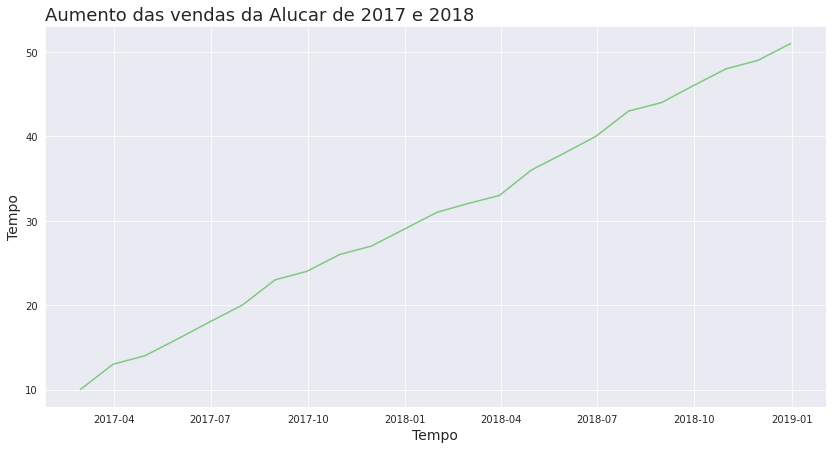

In [19]:
plotar('Aumento das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

In [20]:
# decompor mais uma vez e agora é com o aumento
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


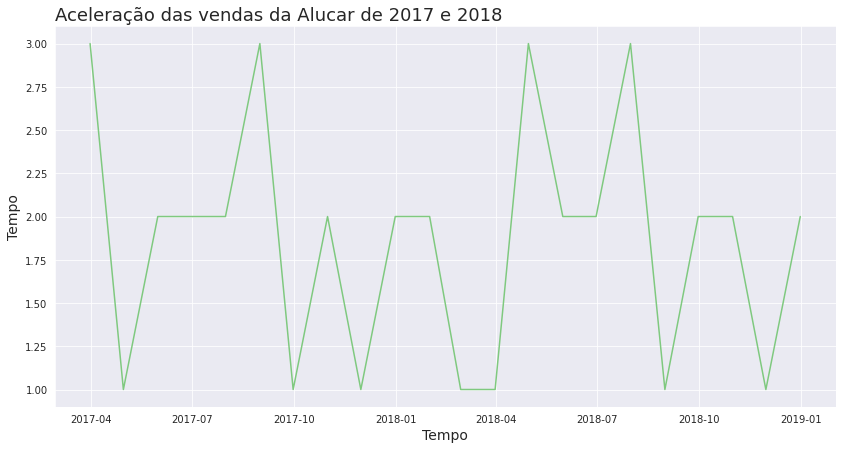

In [21]:
plotar('Aceleração das vendas da Alucar de 2017 e 2018', 'Tempo', 'aceleração', 'mes', 'aceleracao', alucar)

# juntando gráficos

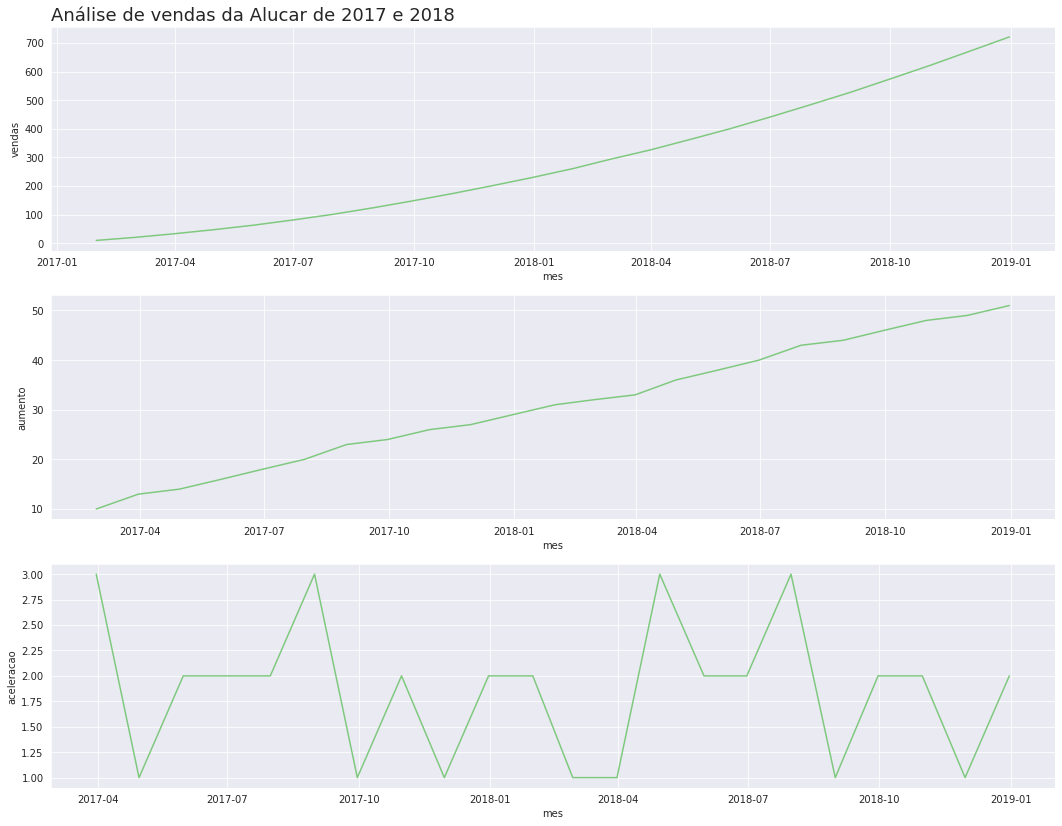

In [22]:
plt.figure(figsize=(18, 14))
# 3 gráficos então 3 partes, 1 = ocupa o quadrante inteiro, 1= primeiro gráfico
ax = plt.subplot(3,1,1)
ax.set_title('Análise de vendas da Alucar de 2017 e 2018', fontsize = 18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)

plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)

plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax = ax

In [23]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
  plt.figure(figsize=(18, 14))
  # 3 gráficos então 3 partes, 1 = ocupa o quadrante inteiro, 1= primeiro gráfico
  ax = plt.subplot(3,1,1)
  ax.set_title(titulo, fontsize = 18, loc='left')
  sns.lineplot(x=x, y=y1, data=dataset)

  plt.subplot(3,1,2)
  sns.lineplot(x=x, y=y2, data=dataset)

  plt.subplot(3,1,3)
  sns.lineplot(x=x, y=y3, data=dataset)
  ax = ax

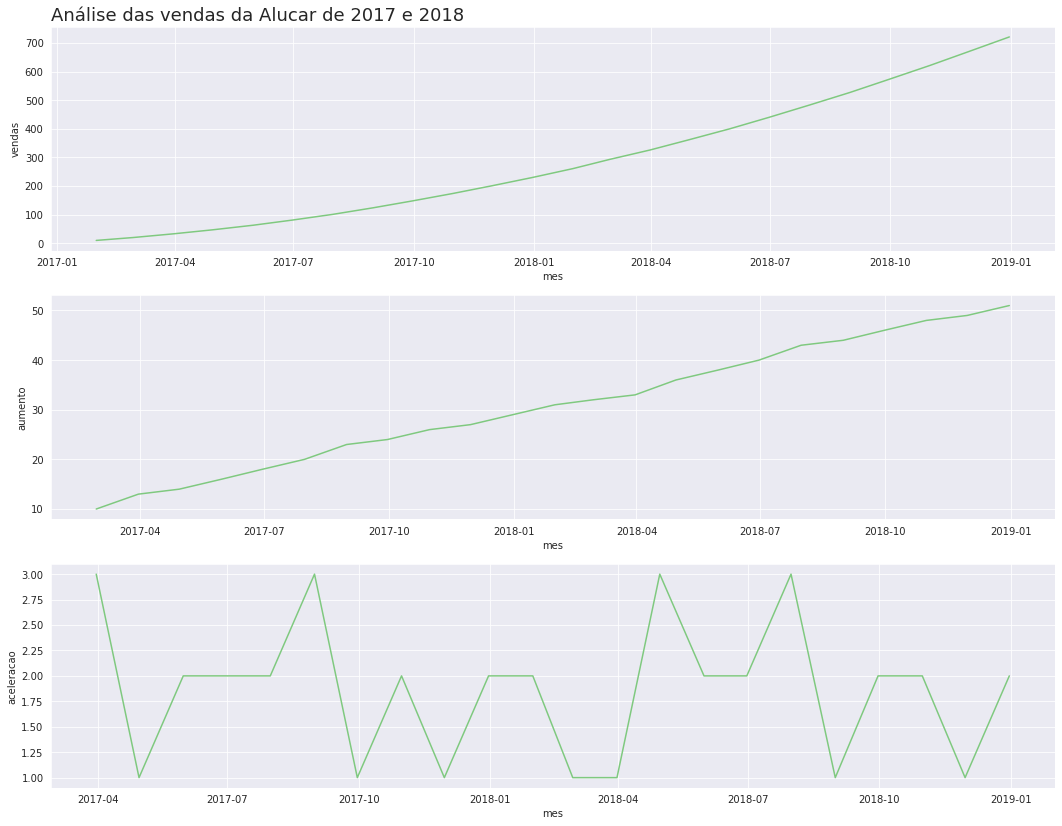

In [24]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Análise das vendas da Alucar de 2017 e 2018')

In [25]:
from pandas.plotting import autocorrelation_plot

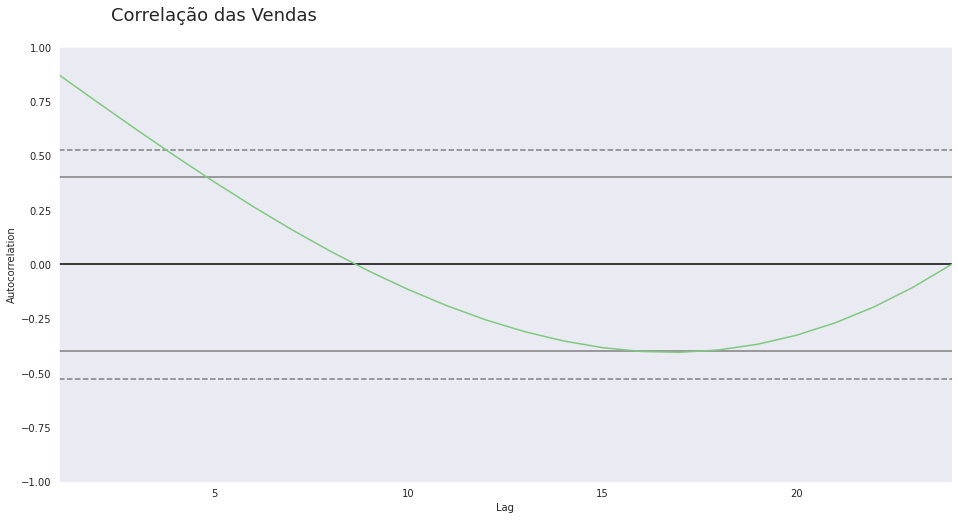

In [26]:
# autocorrelação é uma medida de correlação entre as series temporais 
# observadas

ax = plt.figure(figsize=(16,8))
ax.suptitle('Correlação das Vendas', fontsize = 18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

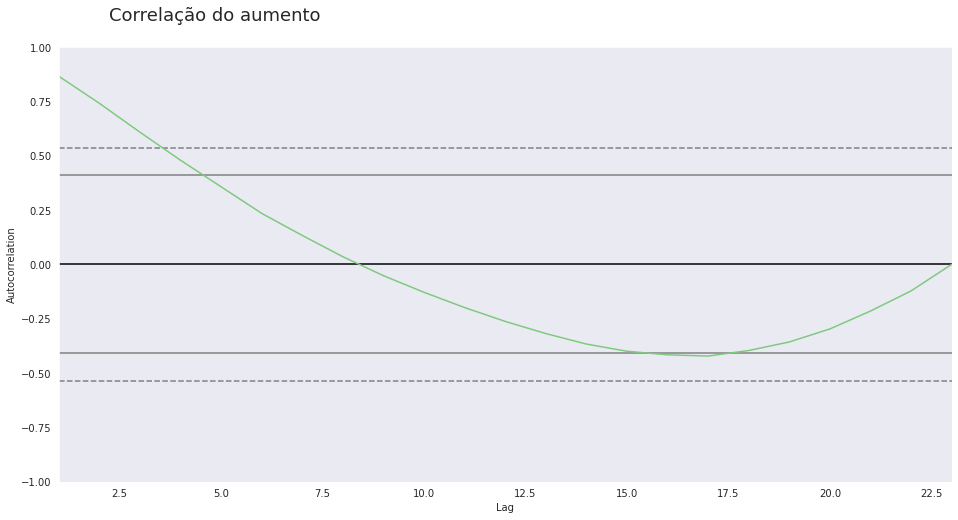

In [27]:
# o aumento começa no index 1, então tem que passar pro código que ele começa 
# no index 1
ax = plt.figure(figsize=(16,8))
ax.suptitle('Correlação do aumento', fontsize = 18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

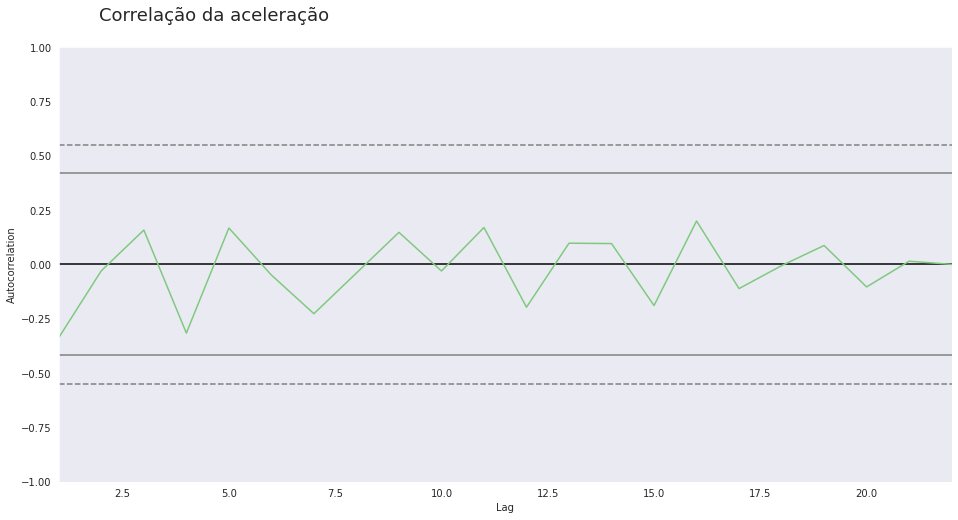

In [28]:
ax = plt.figure(figsize=(16,8))
ax.suptitle('Correlação da aceleração', fontsize = 18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

# Alucar - Analisando assinantes da newsletter

In [29]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [30]:
# sempre é bom saber o tipo de dados que estamos trabalhando
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [31]:
print('Quantidade de linhas e colunas: ',assinantes.shape)
print('Quantidade de dados nulos: ', assinantes.isna().sum().sum())

Quantidade de linhas e colunas:  (24, 2)
Quantidade de dados nulos:  0


In [32]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [33]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


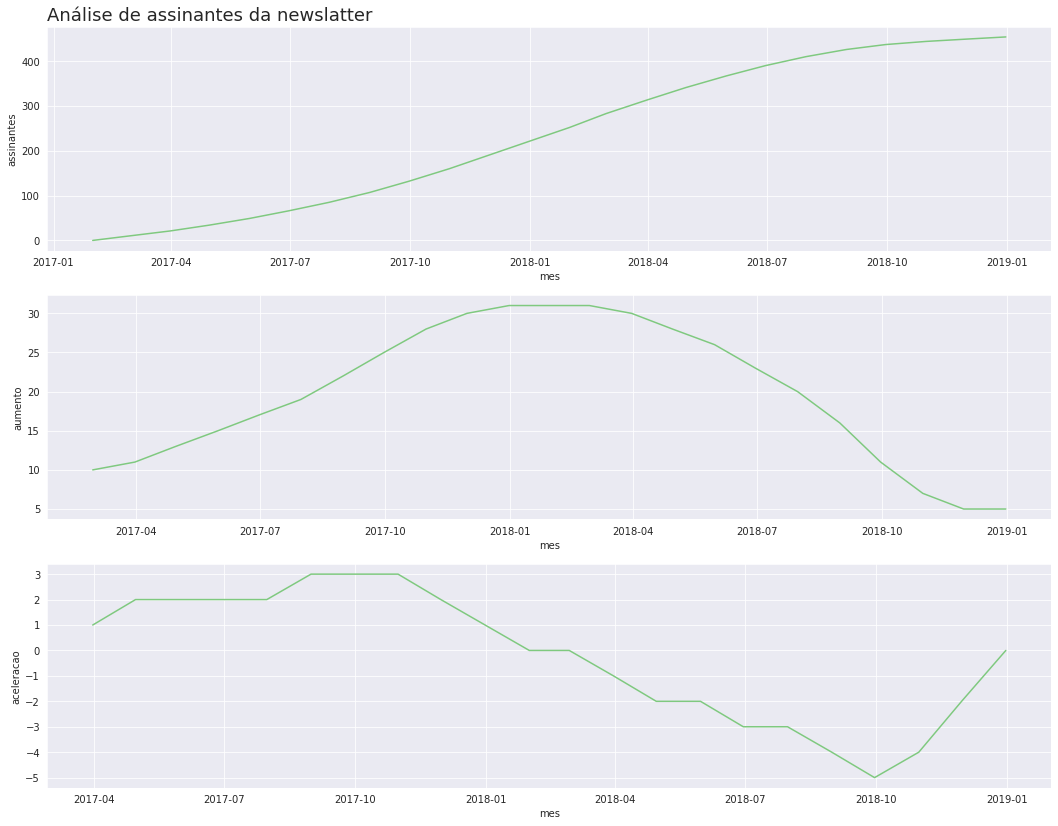

In [34]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de assinantes da newslatter')

# Análisando as vendas da Chocolura
aprendendo sobre sazonalidade, que é um padrão repetitivo dentro de um determinado periodo fixo de tempo.

In [35]:
chocolura = pd.read_csv('chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [36]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [37]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [38]:
print('Quantidade de linhas: ', chocolura.shape)
print('Quantidade de dados nulos: ', chocolura.isna().sum().sum())

Quantidade de linhas:  (24, 2)
Quantidade de dados nulos:  0


In [39]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


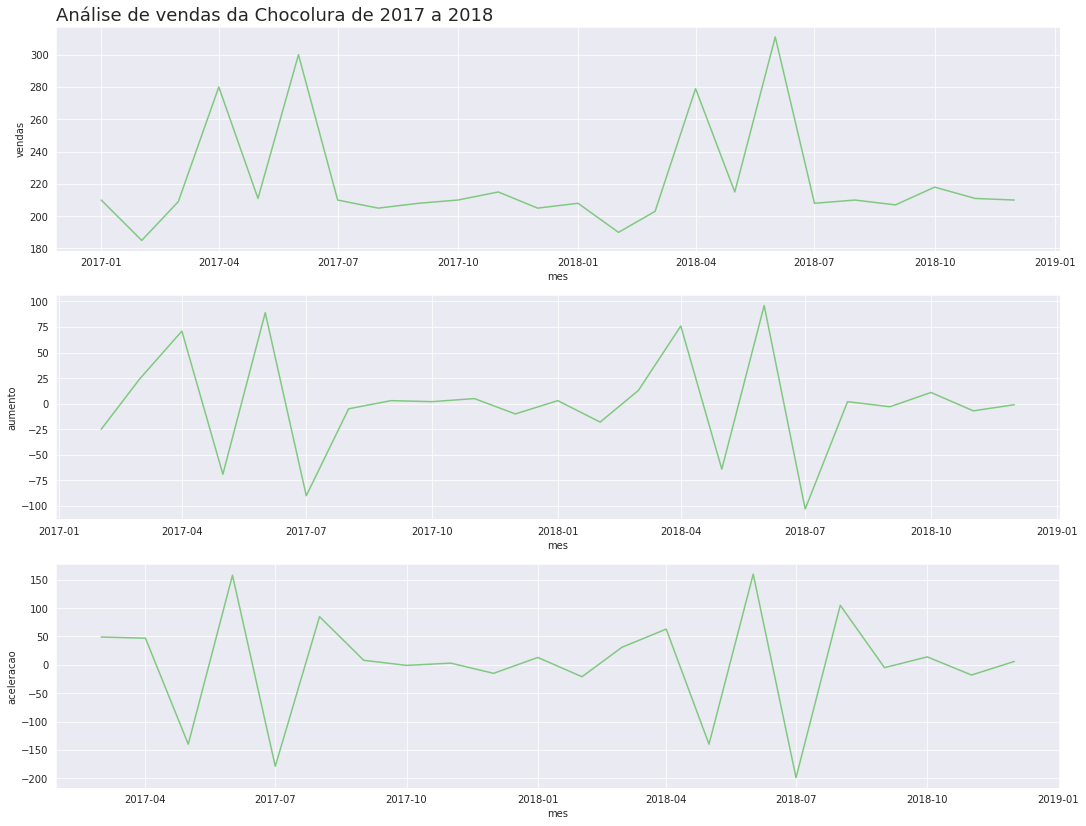

In [40]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Análise de vendas da Chocolura de 2017 a 2018')

# Chocolura - Vendas diárias (Outubro e Novembro)

In [41]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [42]:
print('Quantidade de linhas e colunas: ', vendas_por_dia.shape)
print('Quantidade de dados nulos: ', vendas_por_dia.isna().sum().sum())

Quantidade de linhas e colunas:  (61, 2)
Quantidade de dados nulos:  0


In [43]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [44]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [45]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


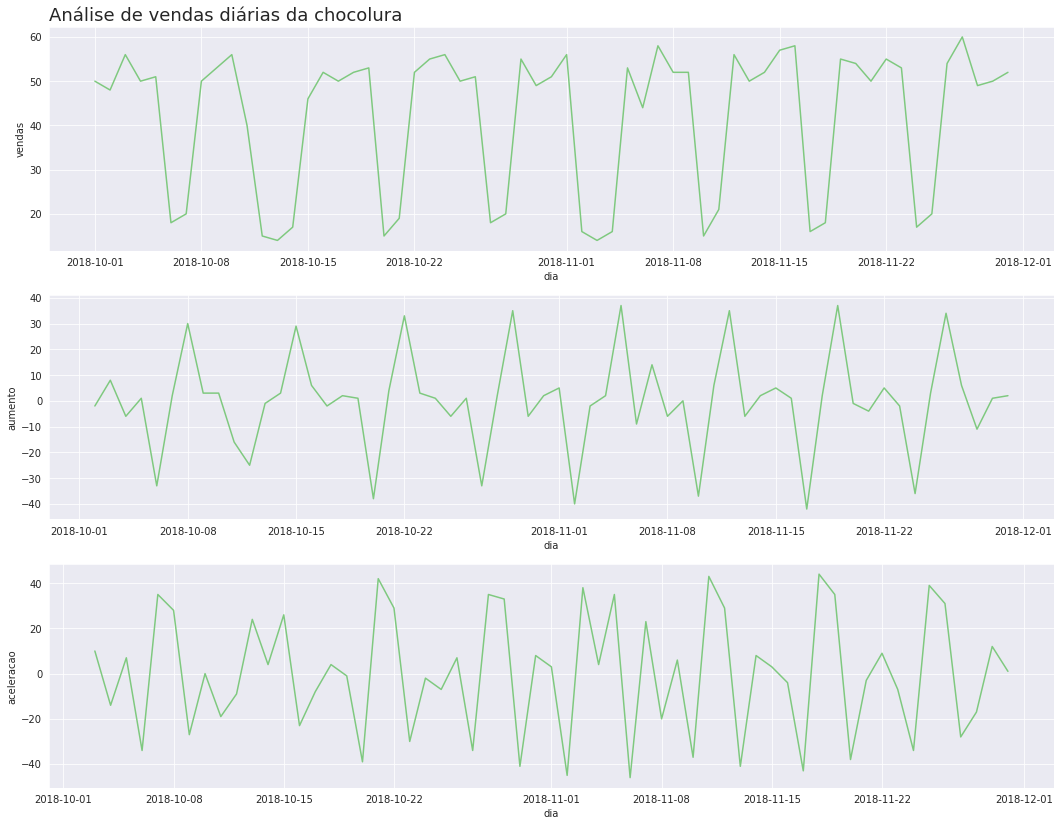

In [46]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Análise de vendas diárias da chocolura')

## Análisando a sazonalidade o gráfico acima

In [47]:
# criando uma coluna com o nome do dia da semana de cada registro com a função
# dt.day_name()
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


In [48]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [49]:
dias_traduzidos = {'Monday' : 'segunda',
                   'Tuesday' : 'terca',
                   'Wednesday' : 'quarta',
                   'Thursday' : 'quinta',
                   'Friday' : 'sexta',
                   'Saturday' : 'sabado',
                   'Sunday' : 'domingo'
}

In [50]:
# renomeando dos dias da semana com a função map
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,segunda
1,2018-10-02,48,-2.0,NaN,terca
2,2018-10-03,56,8.0,10.0,quarta
3,2018-10-04,50,-6.0,-14.0,quinta
4,2018-10-05,51,1.0,7.0,sexta


In [51]:
# nos feriados e nos finais de semana, está acontecendo alguma coisa pra cair as vendas
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,segunda
1,2018-10-02,48,-2.0,NaN,terca
2,2018-10-03,56,8.0,10.0,quarta
3,2018-10-04,50,-6.0,-14.0,quinta
4,2018-10-05,51,1.0,7.0,sexta
5,2018-10-06,18,-33.0,-34.0,sabado
6,2018-10-07,20,2.0,35.0,domingo
7,2018-10-08,50,30.0,28.0,segunda
8,2018-10-09,53,3.0,-27.0,terca
9,2018-10-10,56,3.0,0.0,quarta


## agrupando os dias

In [52]:
# media dos valores de cada dia das vendas, aumento e aceleração
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [53]:
# sabado e o pior dia das vendas, já segunda tem o melhor dia das vendas
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
domingo,19.0,3.0,31.0
quarta,53.0,1.0,2.0
quinta,51.0,-2.0,-3.0
sabado,16.0,-28.0,-20.0
segunda,52.0,34.0,31.0
sexta,45.0,-7.0,-5.0
terca,52.0,-1.0,-34.0


# Correlação das vendas Diárias

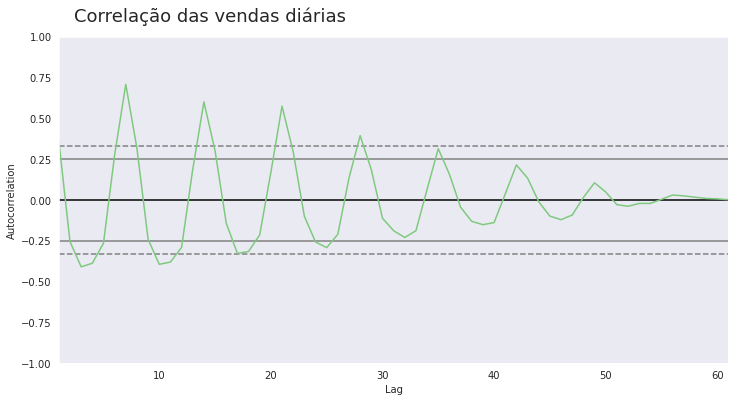

In [54]:
# os valores de venda, aumento e aceleração estão correlacionados?
# autocorrelação da venda

ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

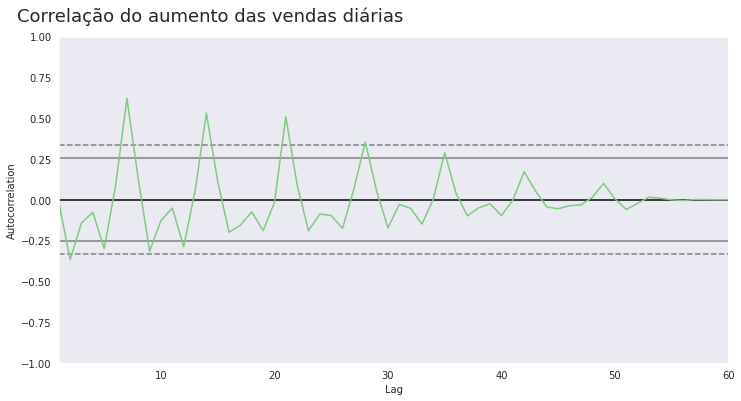

In [55]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

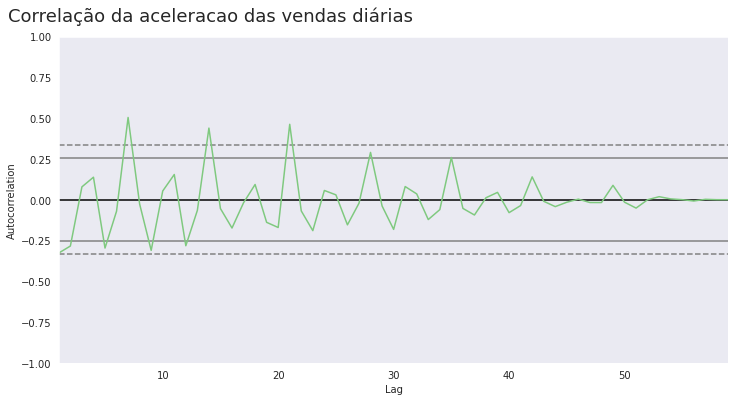

In [56]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação da aceleracao das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

# Cafélura - Análise de vendas

In [57]:
cafelura = pd.read_csv('cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [58]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [59]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [60]:
print('Quantidade de linhas e colunas:', cafelura.shape)
print('Quantidade de dados nulos:', cafelura.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


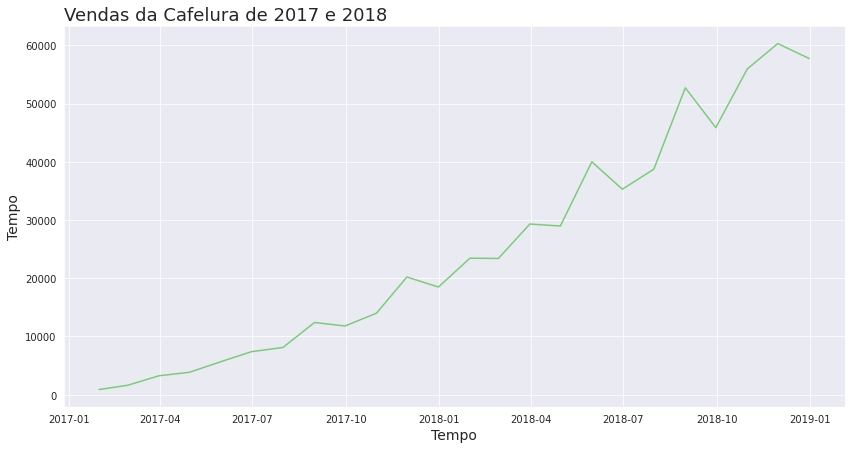

In [61]:
plotar('Vendas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas',
       'mes', 'vendas', cafelura)

In [62]:
# normalizando os dados
# quantidade de dias de final de semana por mes, então o mes 1 eu tive 8 dias de final de semana
quantidade_de_dias_de_fds = pd.read_csv('dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [63]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [64]:
# pegando as quantidades de vendas e dividir pela quantidade de finais de semana que teve
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


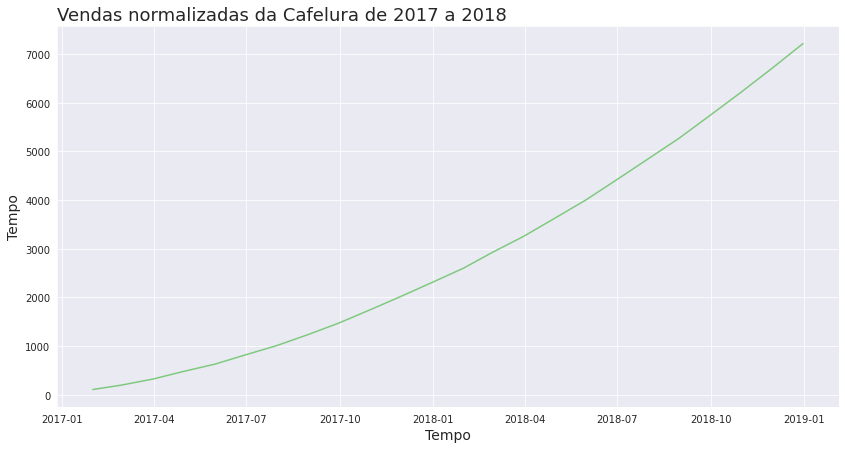

In [65]:
# quando tiramos os finais de semana, temos um grafico diferente do original
plotar('Vendas normalizadas da Cafelura de 2017 a 2018',
       'Tempo', 'Vendas normalizadas', 'mes', 'vendas_normalizadas', cafelura)

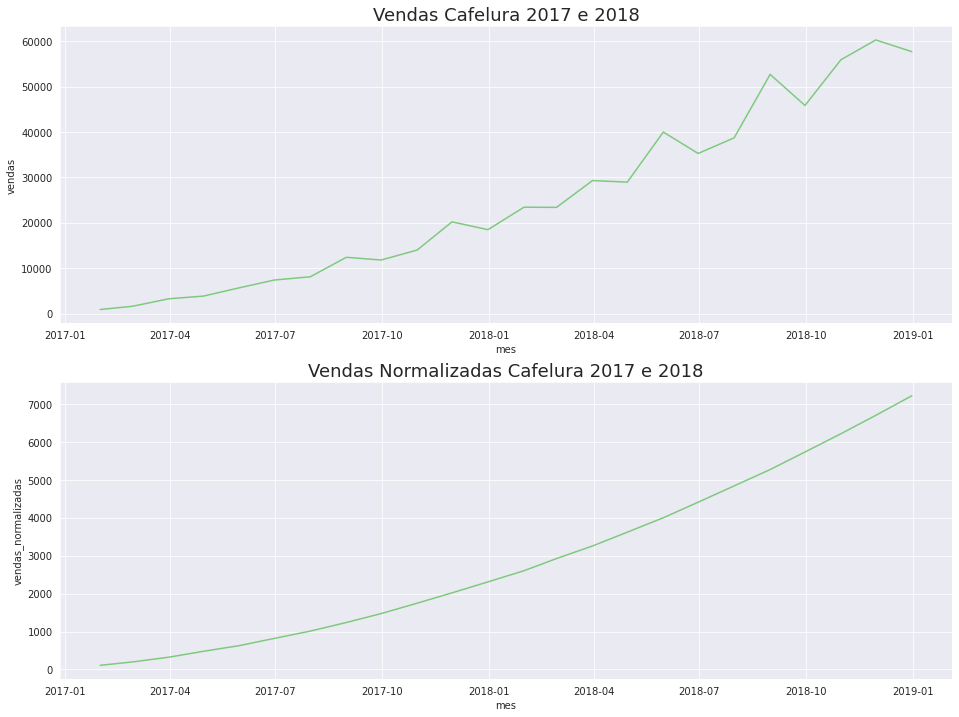

In [66]:
plt.figure(figsize=(16, 12))
ax = plt.subplot(2, 1, 1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)

ax = plt.subplot(2, 1, 2)
ax.set_title('Vendas Normalizadas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)

# Sempre que for análisar uma serie temporal precisa identificar a tendência, sazonalidade e os ruidos

In [67]:
# pegando a tendência a sazonalidade e os ruidos de uma só vez
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


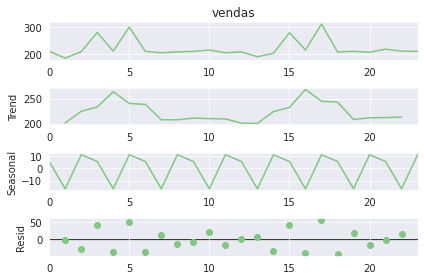

In [87]:
resultado = seasonal_decompose(chocolura['vendas'],  freq=3)
ax = resultado.plot()

In [88]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [89]:
data = ({
       'observacao':observacao,
       'tendencia':tendencia, 
       'sazonalidade':sazonalidade,
       'ruido':ruido
})
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


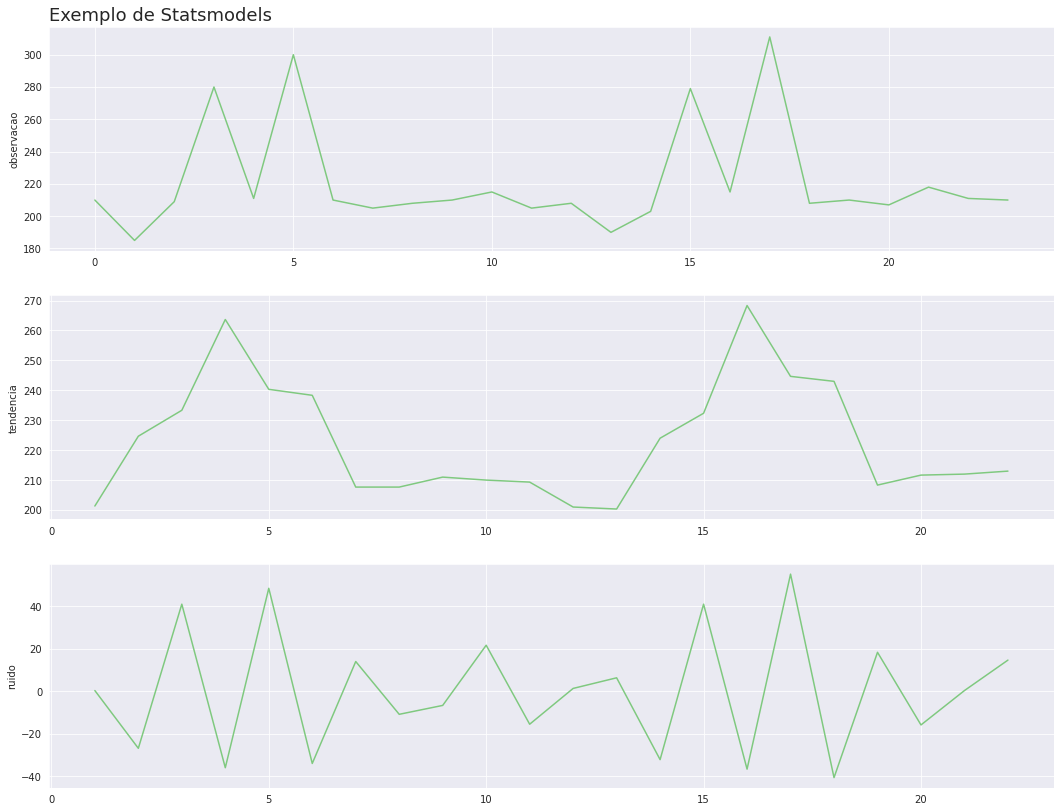

In [90]:
# para pegar a frequencia basta colocar o como index, igual no código a seguir
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'ruido', resultado, 'Exemplo de Statsmodels')

# Alucel - Análise de vendas

In [91]:
alucel = pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [92]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [93]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [94]:
print('Quantidade de linhas e colunas:', alucel.shape)
print('Quantidade de dados nulos:', alucel.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [95]:
alucel ['aumento'] = alucel ['vendas'].diff()
alucel ['aceleracao'] = alucel ['aumento'].diff()

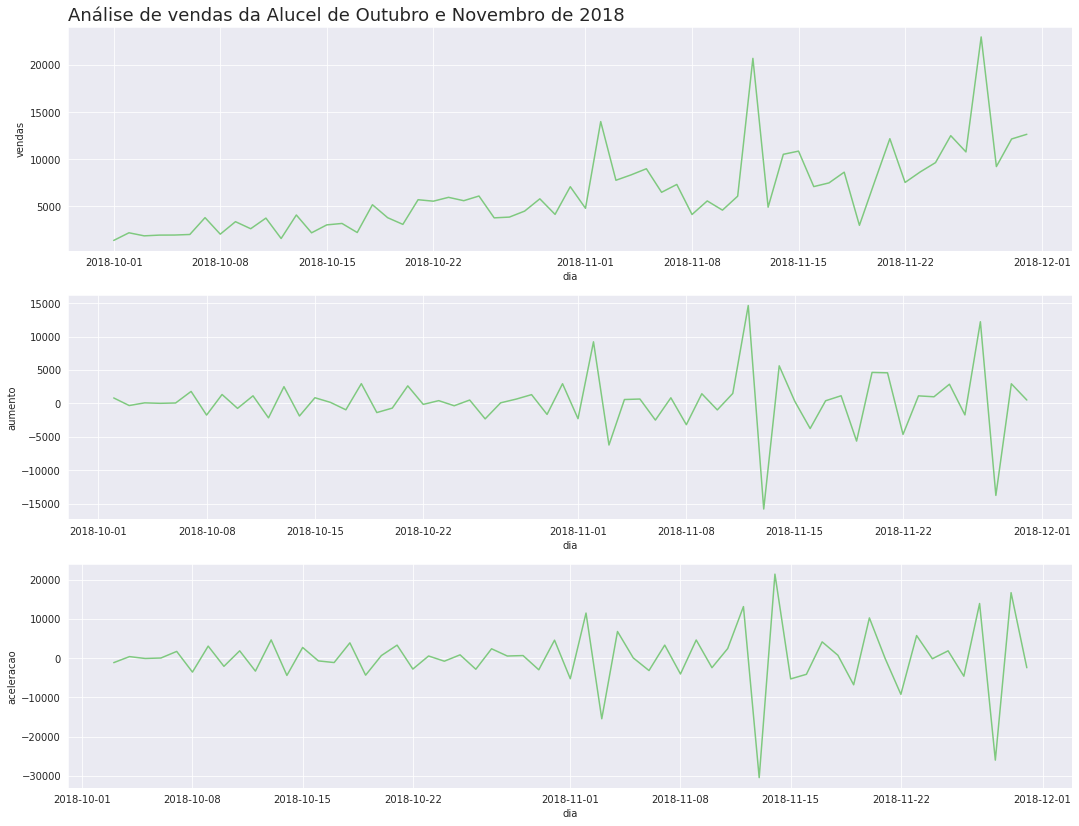

In [96]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Análise de vendas da Alucel de Outubro e Novembro de 2018')

## Média móvel
ela pega dois ou mais pontos e tira uma media entre eles e faz isso para todo base de dados, uma outra forma de explicar é usando a base de dados da aluracel, a media movel pega dois dias e tira a media, pega mais dois dias e tira a media ou pega 7 dias e tira a media e depois pega mais 7 dias e tira a media, até completar a base de dados

In [97]:
# rolling calcula a média móvel
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

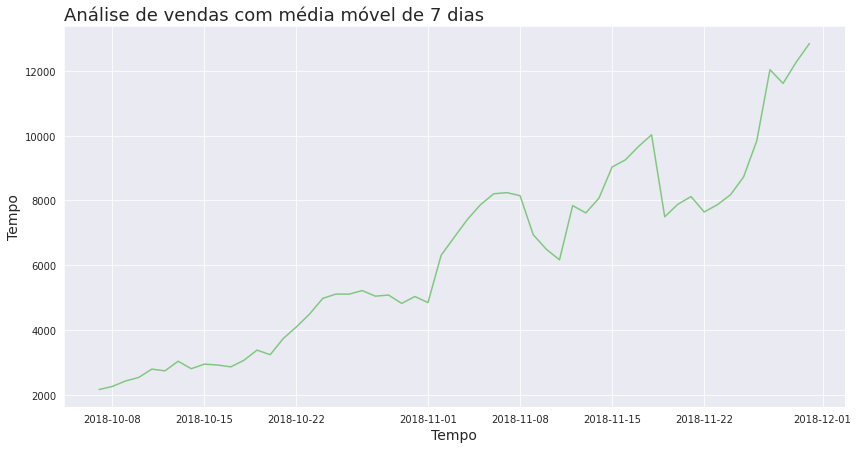

In [98]:
plotar('Análise de vendas com média móvel de 7 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel', alucel)

In [99]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

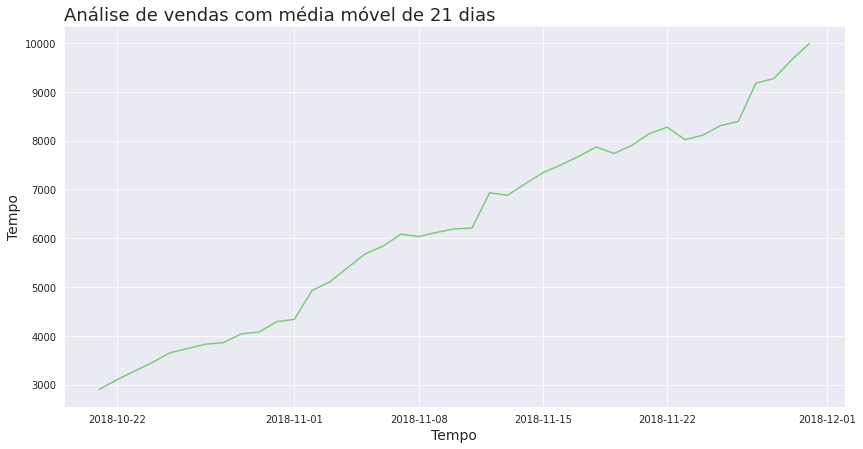

In [100]:
plotar('Análise de vendas com média móvel de 21 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel_21', alucel)

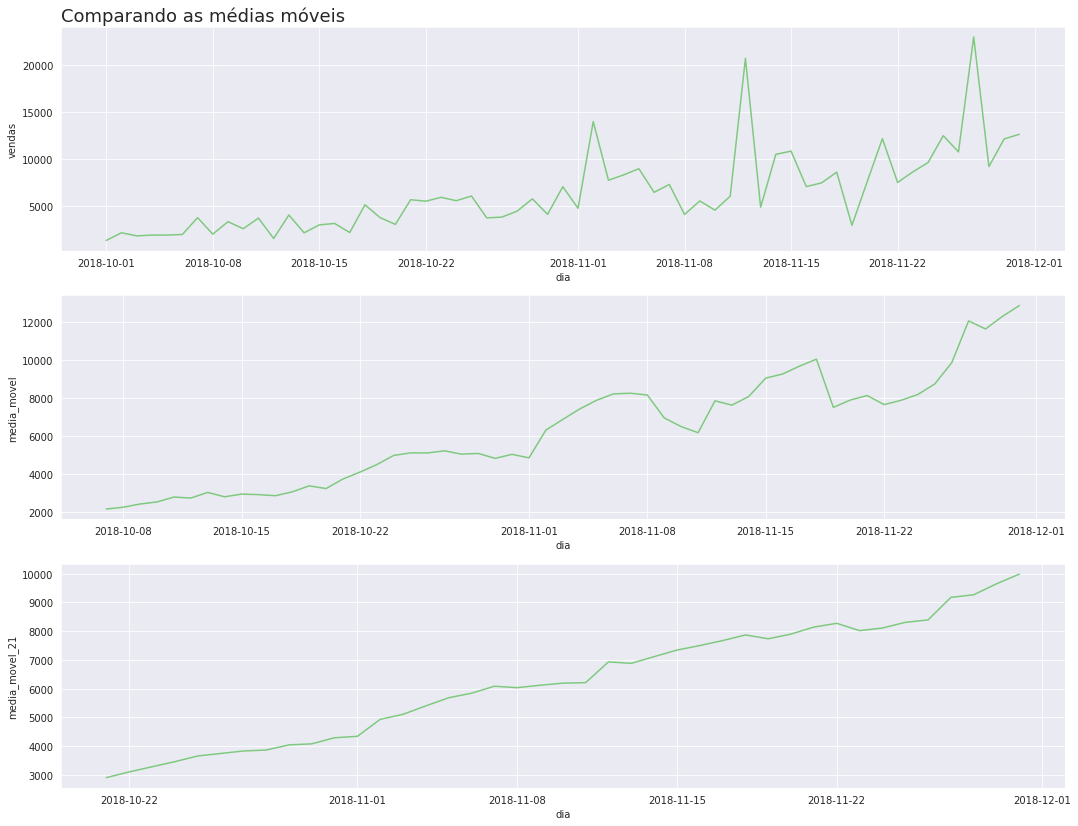

In [101]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21', alucel, 'Comparando as médias móveis')